In [10]:
import sys, importlib, os
repo_start = f'../'
sys.path.append(repo_start)

import torchist

from modules.utils.imports import *
from modules.utils.numpy_torch_conversion import *
from modules.binn.build_binns import BINN
from modules.binn.model_wrapper import model_wrapper
from modules.loaders.format_data import format_data
from modules.generate_data.simulate_system import reaction

np.set_printoptions(threshold=sys.maxsize)

In [2]:
# define training data
training_data_path = '/work/users/s/m/smyersn/elston/projects/kinetics_binns/data/'
training_data_files = ['high_equal_random_data.npz', 'high_u_random_data.npz', 
              'high_v_random_data.npz', 'random_data.npz']

# Load and format training data
xt, u, v, shape_u, shape_v = format_data(f'{repo_start}data/spikes_data.npz', plot=False)
u_triangle_mesh, v_triangle_mesh = lltriangle(u, v)

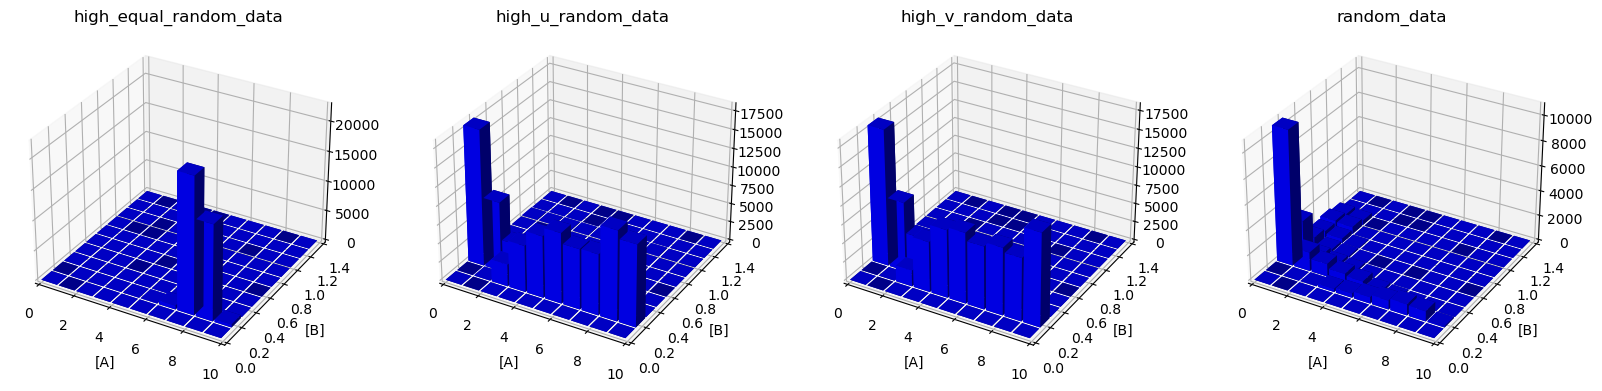

In [5]:
num_subplots = len(training_data_files)
nbins = 10

fig = plt.figure(figsize=(20, 8))

for i in range(num_subplots):
    xt, u, v, shape_u, shape_v = format_data(training_data_path+'/'+training_data_files[i], plot=False)
    
    hist, xedges, yedges = np.histogram2d(u.flatten(), v.flatten(), bins=nbins, range=[[0, 10], [0, 1.4]])
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    # Construct arrays with the dimensions for the 16 bars.
    dx = ((xpos[-1] - xpos[0]) / nbins) * np.ones_like(zpos)
    dy = ((ypos[-1] - ypos[0]) / nbins) * np.ones_like(zpos)
    dz = hist.flatten()
    
    ax = fig.add_subplot(1, num_subplots, i + 1, projection='3d')
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
    
    # Add labels, titles, legends, etc., as needed
    ax.set_xlabel('[A]')
    ax.set_ylabel('[B]')
    ax.set_xlim3d((0, 10))
    ax.set_ylim3d((0, 1.4))
    ax.set_title(f'{training_data_files[i].split(".")[0]}')

# Show the plot
plt.savefig('separate_training_3d_hist.png')

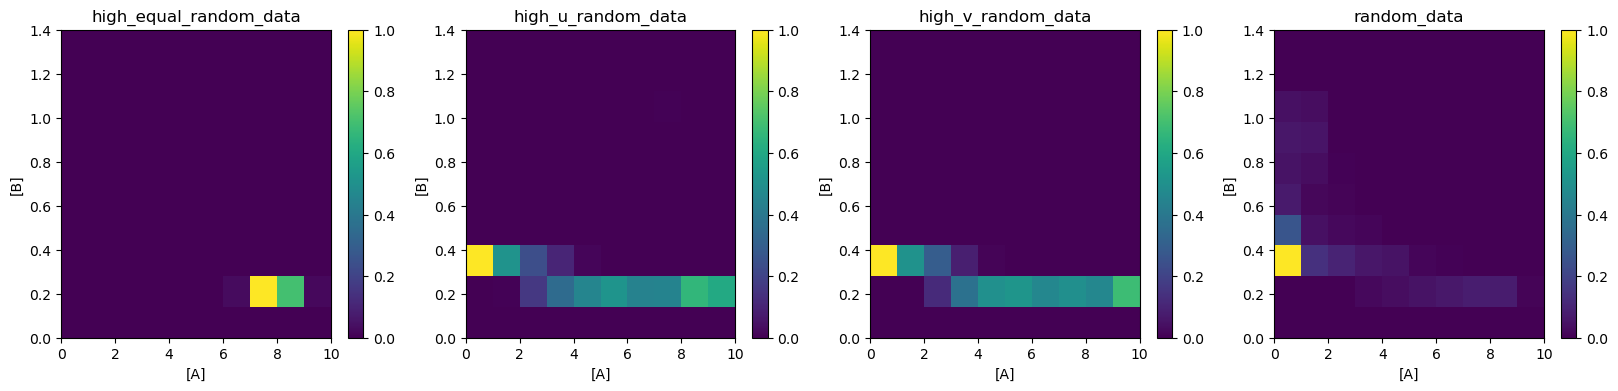

In [6]:
num_subplots = len(training_data_files)
nbins = 10

fig = plt.figure(figsize=(20, 4))

for i in range(num_subplots):
    xt, u, v, shape_u, shape_v = format_data(training_data_path+'/'+training_data_files[i], plot=False)
        
    ax = fig.add_subplot(1, num_subplots, i + 1)
    c = ax.hist2d(u.flatten(), v.flatten(), bins=nbins, density=True, range=[[0, 10], [0, 1.4]])
    
    # Add labels, titles, legends, etc., as needed
    ax.set_xlabel('[A]')
    ax.set_ylabel('[B]')
    ax.set_title(f'{training_data_files[i].split(".")[0]}')
    
    fig.colorbar(mappable=cm.ScalarMappable(), ax=ax)
    
# Show the plot
plt.savefig('separarte_training_2d_hist.png')

Numpy

In [41]:
hist, xedges, yedges = np.histogram2d(u.flatten(), v.flatten(), bins=nbins, range=[[0, 10], [0, 1.4]], density=True)

In [42]:
np.set_printoptions(suppress=True)
hist

array([[0.        , 0.        , 2.94862637, 0.78296703, 0.20521978,
        0.14230769, 0.18324176, 0.12527473, 0.        , 0.        ],
       [0.        , 0.        , 0.41373626, 0.11593407, 0.05412088,
        0.09752747, 0.15686813, 0.09642857, 0.        , 0.        ],
       [0.        , 0.00714286, 0.27967033, 0.06098901, 0.02967033,
        0.01703297, 0.00054945, 0.        , 0.        , 0.        ],
       [0.        , 0.06895604, 0.18406593, 0.03461538, 0.00494505,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.09395604, 0.14065934, 0.00796703, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.14065934, 0.04505495, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.19395604, 0.0206044 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.24175824, 0.0010989

Torch (CPU)

In [54]:
uv = torch.column_stack((to_torch(u), to_torch(v)))
hist, edges = torch.histogramdd(input=uv, bins=nbins, range=[0, 10, 0, 1.4], density=True)
edges

(tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 tensor([0.0000, 0.1400, 0.2800, 0.4200, 0.5600, 0.7000, 0.8400, 0.9800, 1.1200,
         1.2600, 1.4000]))

In [55]:
hist

tensor([[0.0000e+00, 0.0000e+00, 2.9486e+00, 7.8297e-01, 2.0522e-01, 1.4231e-01,
         1.8324e-01, 1.2527e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 4.1374e-01, 1.1593e-01, 5.4121e-02, 9.7527e-02,
         1.5687e-01, 9.6429e-02, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 7.1429e-03, 2.7967e-01, 6.0989e-02, 2.9670e-02, 1.7033e-02,
         5.4945e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 6.8956e-02, 1.8407e-01, 3.4615e-02, 4.9451e-03, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 9.3956e-02, 1.4066e-01, 7.9670e-03, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4066e-01, 4.5055e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.9396e-01, 2.0604e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.4176

Torchist (GPU)

In [50]:
hist = torchist.normalize(torchist.histogramdd(uv, bins=10, 
                                low=[0, 0], 
                                upp=[10, 1.4]))

edges = torchist.histogramdd_edges(uv, bins=10, 
                                low=[0, 0], 
                                upp=[10, 1.4])
edges

[tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 tensor([0.0000, 0.1400, 0.2800, 0.4200, 0.5600, 0.7000, 0.8400, 0.9800, 1.1200,
         1.2600, 1.4000])]

In [51]:
hist

(tensor([[0.0000e+00, 0.0000e+00, 4.1281e-01, 1.0962e-01, 2.8731e-02, 1.9923e-02,
          2.5654e-02, 1.7538e-02, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 5.7923e-02, 1.6231e-02, 7.5769e-03, 1.3654e-02,
          2.1962e-02, 1.3500e-02, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 1.0000e-03, 3.9154e-02, 8.5385e-03, 4.1538e-03, 2.3846e-03,
          7.6923e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 9.6538e-03, 2.5769e-02, 4.8462e-03, 6.9231e-04, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 1.3154e-02, 1.9692e-02, 1.1154e-03, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 1.9692e-02, 6.3077e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 2.7154e-02, 2.8846e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0

In [21]:
hist = torchist.normalize(torchist.histogramdd(uv, bins=10, 
                                low=[min(u).item(), min(v).item()], 
                                upp=[max(u).item(), max(v).item()]))

edges = torchist.histogramdd_edges(uv, bins=10, 
                                low=[min(u).item(), min(v).item()], 
                                upp=[max(u).item(), max(v).item()])


In [22]:
edges

[tensor([2.8348e-06, 9.2051e-01, 1.8410e+00, 2.7615e+00, 3.6820e+00, 4.6026e+00,
         5.5231e+00, 6.4436e+00, 7.3641e+00, 8.2846e+00, 9.2051e+00]),
 tensor([0.2151, 0.2960, 0.3770, 0.4579, 0.5389, 0.6198, 0.7008, 0.7817, 0.8627,
         0.9436, 1.0246])]

In [16]:
uv[0, :]

tensor([1.4582, 1.0246])

In [40]:
def calc_inverse_density(uv, hist, edges):
    inverse_densities = torch.zeros(len(uv))
    
    for i in range(len(uv)):
        u_diff = edges[0] - uv[i, 0]
        negative_indices = torch.where(u_diff < 0)[0]
        hist_u_index = torch.argmax(u_diff[negative_indices])
        if len(negative_indices) == 0:
            print('oh shit')
        
        v_diff = edges[1] - uv[i, 1]
        negative_indices = torch.where(v_diff < 0)[0]
        hist_v_index = torch.argmax(v_diff[negative_indices])
        if len(negative_indices) == 0:
            print('oh shit')
        
        inverse_densities[i] = 1 / (hist[hist_u_index, hist_v_index])
        
    return inverse_densities

calc_inverse_density(uv, hist, edges)

tensor([10.3704,  6.3748,  6.3748,  ...,  0.3391,  0.3391,  0.3391])

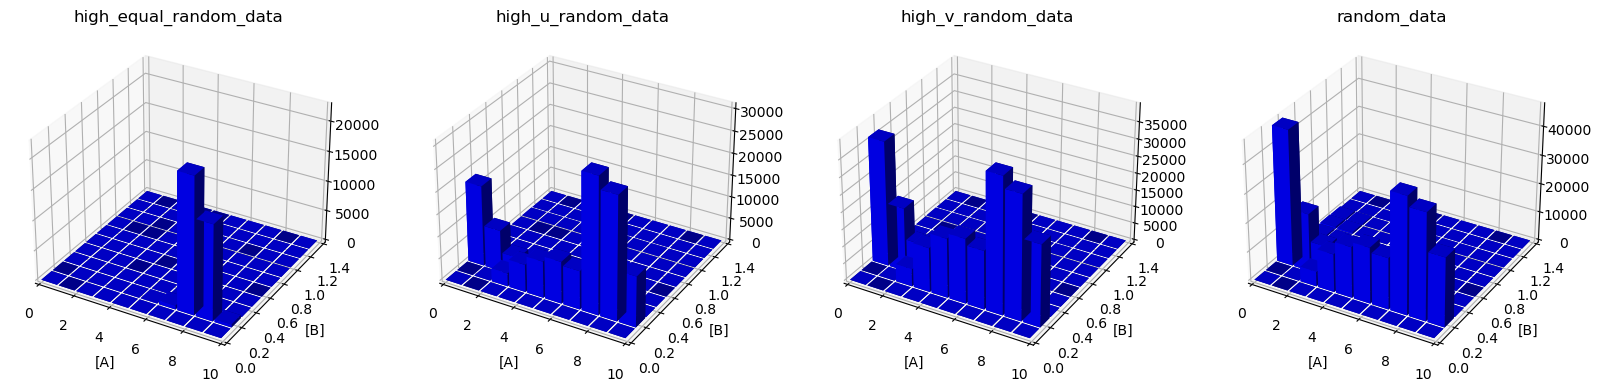

In [55]:
num_subplots = len(training_data_files)
nbins = 10

fig = plt.figure(figsize=(20, 8))

for i in range(num_subplots):
    xt, u, v, shape_u, shape_v = format_data(training_data_path+'/'+training_data_files[i], plot=False)
    if i == 0:
        u_transfer, v_transfer = u.flatten(), v.flatten()
    else:
        u_transfer = np.concatenate((u_transfer, u.flatten()))
        v_transfer = np.concatenate((v_transfer, v.flatten()))
        
    hist, xedges, yedges = np.histogram2d(u_transfer, v_transfer, bins=nbins, range=[[0, 10], [0, 1.4]])
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    # Construct arrays with the dimensions for the 16 bars.
    dx = ((xpos[-1] - xpos[0]) / nbins) * np.ones_like(zpos)
    dy = ((ypos[-1] - ypos[0]) / nbins) * np.ones_like(zpos)
    dz = hist.flatten()
    
    ax = fig.add_subplot(1, num_subplots, i + 1, projection='3d')
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
    
    # Add labels, titles, legends, etc., as needed
    ax.set_xlabel('[A]')
    ax.set_ylabel('[B]')
    ax.set_xlim3d((0, 10))
    ax.set_ylim3d((0, 1.4))
    ax.set_title(f'{training_data_files[i].split(".")[0]}')

# Show the plot
plt.savefig('transfer_learning_3d_hist.png')

In [76]:
hist[8,1]

0.22060439560439563

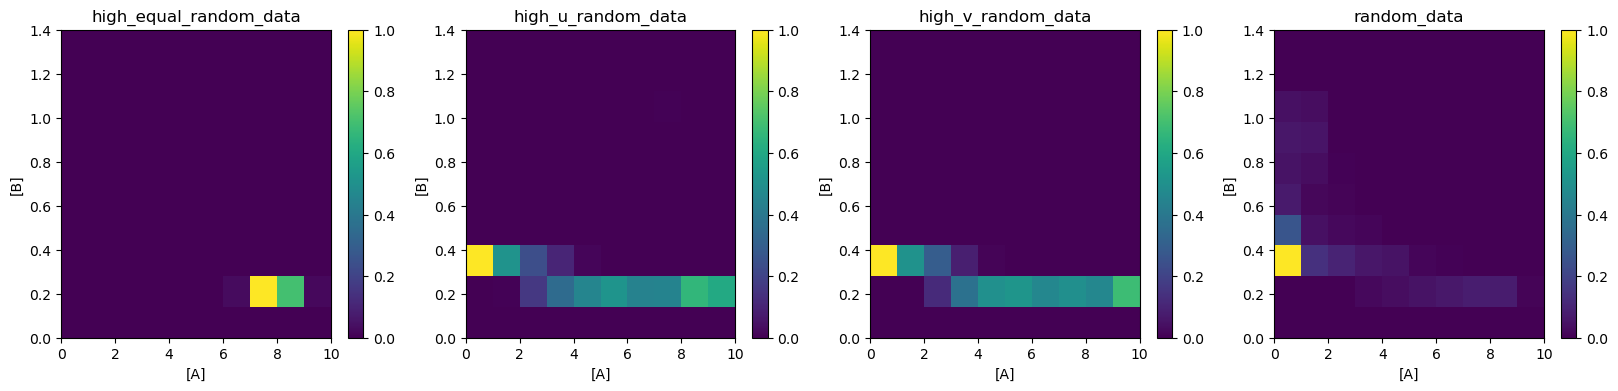

In [56]:
num_subplots = len(training_data_files)
nbins = 10

fig = plt.figure(figsize=(20, 4))

for i in range(num_subplots):
    xt, u, v, shape_u, shape_v = format_data(training_data_path+'/'+training_data_files[i], plot=False)
    if i == 0:
        u_transfer, v_transfer = u.flatten(), v.flatten()
    else:
        u_transfer = np.concatenate((u_transfer, u.flatten()))
        v_transfer = np.concatenate((v_transfer, v.flatten()))
        
    ax = fig.add_subplot(1, num_subplots, i + 1)
    c = ax.hist2d(u.flatten(), v.flatten(), bins=nbins, density=True, range=[[0, 10], [0, 1.4]])
    
    # Add labels, titles, legends, etc., as needed
    ax.set_xlabel('[A]')
    ax.set_ylabel('[B]')
    ax.set_title(f'{training_data_files[i].split(".")[0]}')
    
    fig.colorbar(mappable=cm.ScalarMappable(), ax=ax)
    
# Show the plot
plt.savefig('transfer_learning_2d_hist.png')